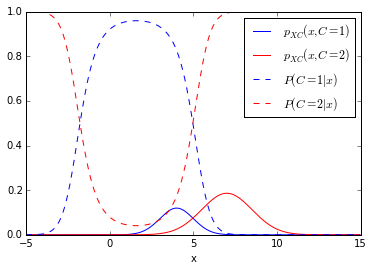

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def normal(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2))) / (sigma * np.sqrt(2 * np.pi))


x = np.arange(-5, 15, 0.05)

pxc1 = normal(x, 4, 1) * 0.3
plt.plot(x, pxc1, 'b-', label=r'$p_{XC}(x, C = 1)$')

pxc2 = normal(x, 7, 1.5) * 0.7
plt.plot(x, pxc2, 'r-', label=r'$p_{XC}(x, C = 2)$')

px = pxc1 + pxc2
p1 = pxc1 / px
p2 = pxc2 / px

plt.plot(x, p1, 'b--', label=r'$P(C = 1 | x)$')
plt.plot(x, p2, 'r--', label=r'$P(C = 2 | x)$')

plt.xlabel('x')
plt.ylim(0, 1)
plt.legend()
plt.show()


1

$ p_{XC}(x, C = 1) = N(\sigma_1, \mu_1) \cdot  P(C = 1) = \frac{1}{\sigma  \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} \cdot 0.3 $

$ P(C = 1 | x) = \frac{p_{XC}(x, C = 1)}{p_X (x)} $ with $p_X (x) = N(\sigma_1, \mu_1) + N(\sigma_2, \mu_2)$

2

$ p_{XC}(x, C = 2) = N(\sigma_2, \mu_2) \cdot  P(C = 2) = \frac{1}{\sigma  \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} \cdot 0.7 $

$ P(C = 2 | x) = \frac{p_{XC}(x, C = 2)}{p_X (x)} $ with same $p_X (x) = N(\sigma_1, \mu_1) + N(\sigma_2, \mu_2)$

In [251]:
from sklearn import datasets
iris = datasets.load_iris()


def normal(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2))) / (sigma * np.sqrt(2 * np.pi))


def prob(data, c, x):
    features = data[c]
    prob = 1

    for i in range(features.shape[1]):
        prob *= normal(x[i], np.mean(features[:, i]), np.std(features[:, i]))
    return prob


def dictify(X):
    irisDict = {}
    for i in range(3):
        irisDict[i] = X[np.where(trainY == i)]
    return irisDict


def classify(data, x):
    bestProb = 0
    bestMatch = -1
    for classNr in range(len(data)):
        thisProb = prob(data, classNr, x)
        if thisProb > bestProb:
            bestMatch = classNr
            bestProb = thisProb
    return bestMatch


X = iris.data
Y = iris.target
n = len(Y)

indices = np.random.permutation(n)  # Get random indices for training set
trainSize = 70  # Percentage to use for training set
splitIndex = int(trainSize * (n / 100))
training_idx, test_idx = indices[:splitIndex], indices[splitIndex:]

trainX = X[training_idx]
testX = X[test_idx]

trainY = Y[training_idx]
testY = Y[test_idx]

trainData = dictify(trainX)

corrects = 0
for i in range(len(testY)):
    if classify(trainData, testX[i]) == testY[i]:
        corrects += 1

accuracy = 100 * corrects / len(testY)
print("Classified %.1f%% of test set correctly." % accuracy)

Classified 93.3% of test set correctly.
